In [2]:
 # handilng data and visualization 
import pandas as pd 
from pandas_profiling import profile_report
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from tqdm.auto import tqdm

# Anomaly Detection
from pycaret.anomaly import setup, create_model, assign_model, evaluate_model, predict_model, save_model, load_model

# preprocessing
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score , confusion_matrix , recall_score, precision_score , f1_score
lb=LabelEncoder()
sc=StandardScaler()
encoder = OneHotEncoder()

# ML models
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# NN Models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam


import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_1707/2066215507.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profili

**Loading Data**

In [3]:
# my_df=pd.read_csv('/kaggle/input/telcom-churns-dataset/TelcoChurn.csv')
my_df=pd.read_csv('customer_churn.csv')

In [4]:
my_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
my_df = my_df[my_df.TotalCharges!=' ']

In [6]:
my_df.TotalCharges = pd.to_numeric(my_df.TotalCharges)

In [7]:
my_df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [8]:
my_df.drop('customerID',axis='columns',inplace=True)

In [9]:
my_df.shape

(7032, 20)

In [10]:
my_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Anomaly Detection** 

In [11]:
# Anomaly Detection 
s = setup(my_df)

,Description,Value
0,Session id,5068
1,Original data shape,"(7032, 20)"
2,Transformed data shape,"(7032, 41)"
3,Ordinal features,6
4,Numeric features,4
5,Categorical features,16
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [12]:
best_model = create_model('svm')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
assign_model(best_model)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Anomaly,Anomaly_Score
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No,0,0.000051
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.950001,1889.500000,No,0,-0.000214
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes,0,-0.000005
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No,0,-0.000028
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes,0,-0.022954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.800003,1990.500000,No,0,-0.000173
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.199997,7362.899902,No,0,0.000038
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450012,No,0,-0.000084
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.400002,306.600006,Yes,0,-0.047229


In [14]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
anomaly_detection_df=predict_model(best_model, data=my_df)

In [16]:
anomaly_detection_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,...,PaperlessBilling,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges,Churn,Anomaly,Anomaly_Score
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,29.85,29.85,0.0,0,0.000051
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,56.95,1889.50,0.0,0,-0.000214
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,53.85,108.15,1.0,0,-0.000005
3,1.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,42.30,1840.75,0.0,0,-0.000028
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,70.70,151.65,1.0,0,-0.022954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,84.80,1990.50,0.0,0,-0.000173
7039,0.0,0.0,1.0,1.0,72.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,103.20,7362.90,0.0,0,0.000031
7040,0.0,0.0,1.0,1.0,11.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,29.60,346.45,0.0,0,-0.000083
7041,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,74.40,306.60,1.0,0,-0.047229


In [17]:
print(f"The number of normal samples in a our dataset is : {anomaly_detection_df['Anomaly'][anomaly_detection_df.Anomaly == 0].value_counts().values[0]}")

The number of normal samples in a our dataset is : 6680


In [18]:
print(f"The number of anomalous samples in a our dataset is : {anomaly_detection_df['Anomaly'][anomaly_detection_df.Anomaly == 1].value_counts().values[0]}")

The number of anomalous samples in a our dataset is : 352


**Data Preparation & Data Visualization**

In [19]:
X=my_df.iloc[:,:-1]
Y=my_df.iloc[:,-1]

In [20]:
X.shape , Y.shape

((7032, 19), (7032,))

In [21]:
print(np.unique(Y))

['No' 'Yes']


(array([1724.,  735.,  561.,  538.,  473.,  444.,  452.,  495.,  501.,
        1109.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <BarContainer object of 10 artists>)

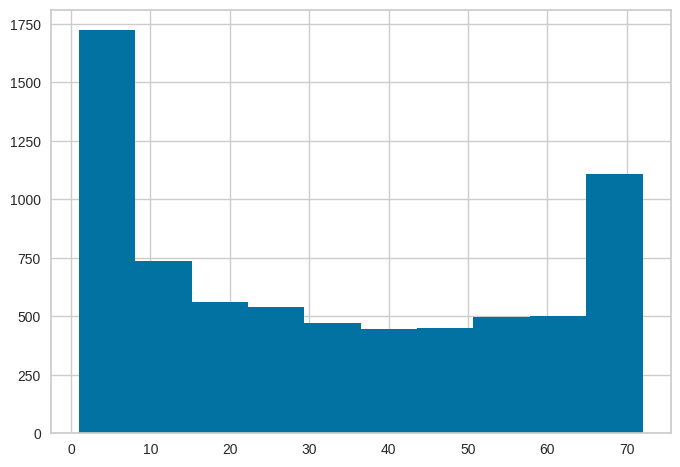

In [22]:
plt.hist(X['tenure'])

(array([1600.,  191.,  365.,  637.,  472.,  894.,  952.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

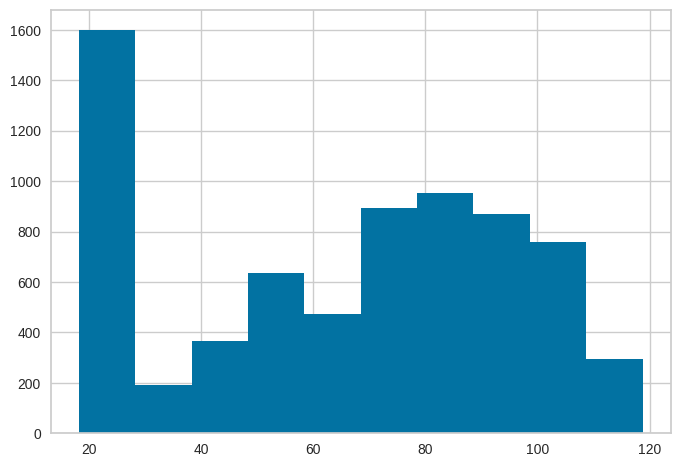

In [23]:
plt.hist(X['MonthlyCharges'])

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

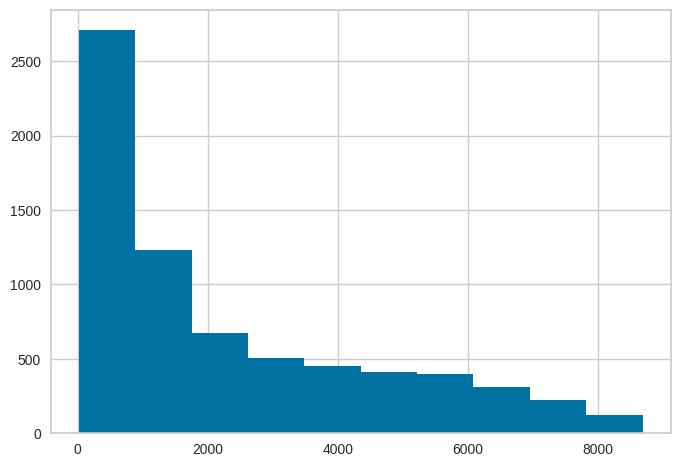

In [24]:
plt.hist(X['TotalCharges'])

Text(0, 0.5, 'Feature 2')

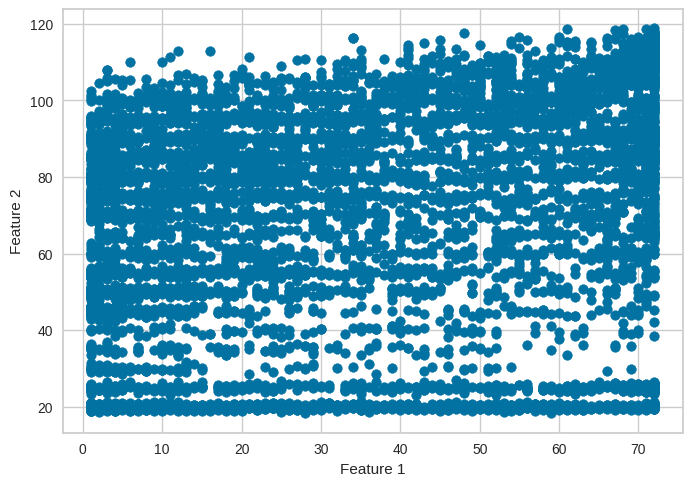

In [25]:
plt.scatter(X['tenure'], X['MonthlyCharges'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

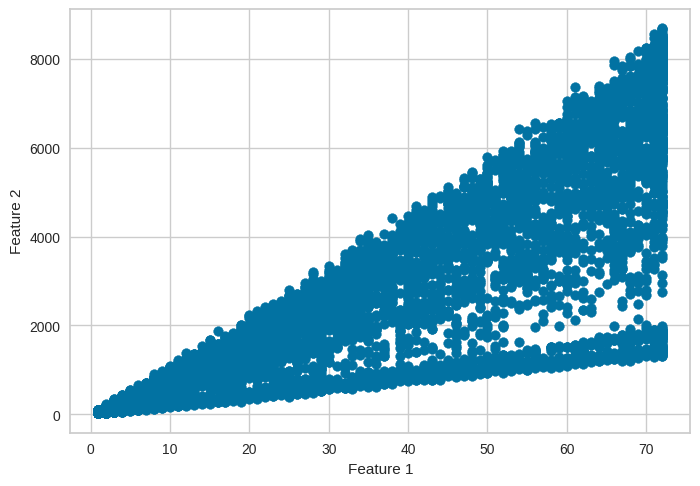

In [26]:
plt.scatter(X['tenure'], X['TotalCharges'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

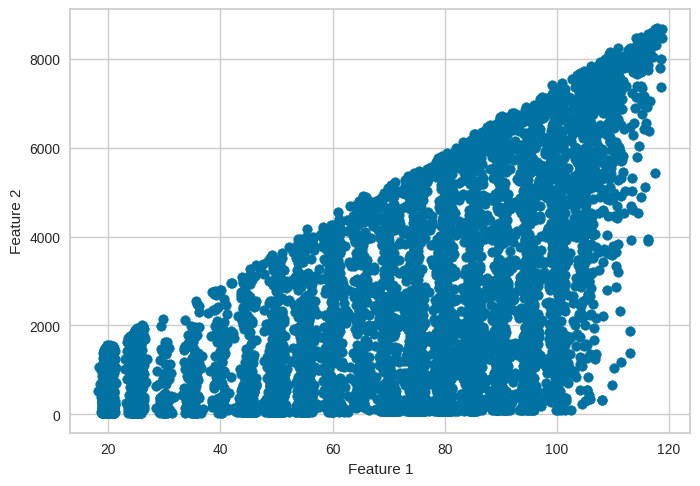

In [27]:
plt.scatter(X['MonthlyCharges'], X['TotalCharges'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

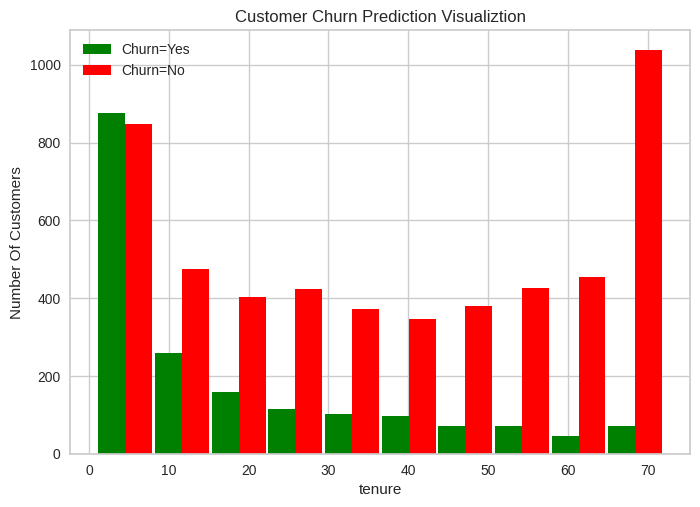

In [28]:
tenure_churn_no = X[Y=='No'].tenure
tenure_churn_yes = X[Y=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

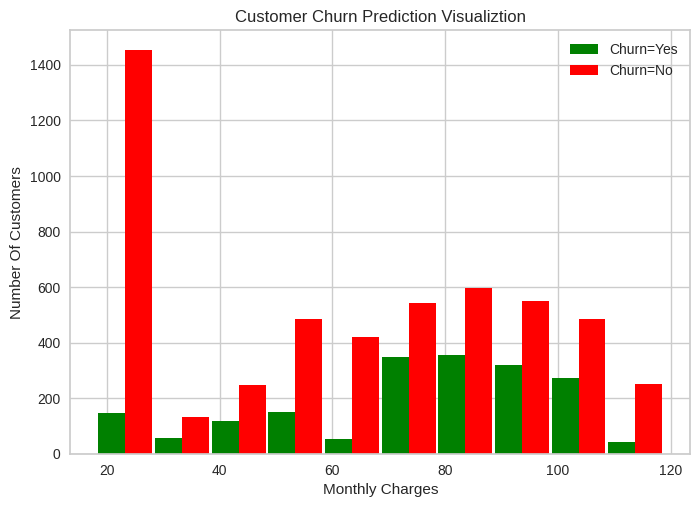

In [29]:
mc_churn_no = X[Y=='No'].MonthlyCharges      
mc_churn_yes = X[Y=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [30]:
print(X.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [31]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns
print(cat_cols)
print(len(cat_cols))

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
15


In [32]:
binary_features=[]
for col in X.columns:
    unique_vals = X[col].nunique()
    if unique_vals == 2:
        print(f"{col} \t\t\t :  has only {unique_vals} unique values and is likely a binary feature.")
        binary_features.append(col)

gender 			 :  has only 2 unique values and is likely a binary feature.
SeniorCitizen 			 :  has only 2 unique values and is likely a binary feature.
Partner 			 :  has only 2 unique values and is likely a binary feature.
Dependents 			 :  has only 2 unique values and is likely a binary feature.
PhoneService 			 :  has only 2 unique values and is likely a binary feature.
PaperlessBilling 			 :  has only 2 unique values and is likely a binary feature.


In [33]:
binary_features.remove('SeniorCitizen')

In [34]:
binary_features

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [35]:
categorical_features=[]
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        if not np.issubdtype(X[col].dtype, np.number):
            unique_vals = X[col].nunique()
            if unique_vals > 2:
                print(f"{col} is a non-numeric categorical column with {unique_vals} categories.")
                categorical_features.append(col)

MultipleLines is a non-numeric categorical column with 3 categories.
InternetService is a non-numeric categorical column with 3 categories.
OnlineSecurity is a non-numeric categorical column with 3 categories.
OnlineBackup is a non-numeric categorical column with 3 categories.
DeviceProtection is a non-numeric categorical column with 3 categories.
TechSupport is a non-numeric categorical column with 3 categories.
StreamingTV is a non-numeric categorical column with 3 categories.
StreamingMovies is a non-numeric categorical column with 3 categories.
Contract is a non-numeric categorical column with 3 categories.
PaymentMethod is a non-numeric categorical column with 4 categories.


In [36]:
categorical_features

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [37]:
numerical_features=[]
for col in X.columns:
    if np.issubdtype(X[col].dtype, np.number):
        print(f"{col} is a numerical column.")
        numerical_features.append(col)

SeniorCitizen is a numerical column.
tenure is a numerical column.
MonthlyCharges is a numerical column.
TotalCharges is a numerical column.


In [38]:
numerical_features.remove('SeniorCitizen')

In [39]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

**Preprocessing :**

1.  Label Encoding 
1.  One Hot Encoding 
1.  Normalization ( Standard Scalar) 
1.  Correlation Matrix 

In [40]:
# Normalization 
X[numerical_features] = sc.fit_transform(X[numerical_features])

In [41]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,-1.280248,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161694,-0.994194
1,Male,0,No,No,0.064303,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260878,-0.173740
2,Male,0,No,No,-1.239504,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363923,-0.959649
3,Male,0,No,No,0.512486,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747850,-0.195248
4,Female,0,No,No,-1.239504,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196178,-0.940457


In [42]:
# label Encoding 
for i in binary_features : 
    X[i]=lb.fit_transform(X[i])
    
    
Y=lb.fit_transform(Y)

In [43]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.280248,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,-1.161694,-0.994194
1,1,0,0,0,0.064303,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,-0.260878,-0.173740
2,1,0,0,0,-1.239504,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,-0.363923,-0.959649
3,1,0,0,0,0.512486,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),-0.747850,-0.195248
4,0,0,0,0,-1.239504,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,0.196178,-0.940457


In [44]:
np.unique(Y)

array([0, 1])

In [45]:
# OneHotEncoding

feature_cols = ['Contract', 'PaymentMethod', 'InternetService']

for i in feature_cols:
        X = X.join(pd.get_dummies(X[i], prefix=i))
X.drop(feature_cols, axis=1, inplace=True)

In [46]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,-1.280248,0,No phone service,No,Yes,No,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0.064303,1,No,Yes,No,Yes,...,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,-1.239504,1,No,Yes,Yes,No,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0.512486,0,No phone service,Yes,No,Yes,...,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,-1.239504,1,No,No,No,No,...,1,0,0,0,0,1,0,0,1,0


In [47]:
categorical_features=[]
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        if not np.issubdtype(X[col].dtype, np.number):
            unique_vals = X[col].nunique()
            if unique_vals > 2:
                print(f"{col} is a non-numeric categorical column with {unique_vals} categories.")
                categorical_features.append(col)

MultipleLines is a non-numeric categorical column with 3 categories.
OnlineSecurity is a non-numeric categorical column with 3 categories.
OnlineBackup is a non-numeric categorical column with 3 categories.
DeviceProtection is a non-numeric categorical column with 3 categories.
TechSupport is a non-numeric categorical column with 3 categories.
StreamingTV is a non-numeric categorical column with 3 categories.
StreamingMovies is a non-numeric categorical column with 3 categories.


In [48]:
categorical_features

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [49]:
for i in categorical_features : 
    print(f"{X[i].value_counts()}\n\n")

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64




In [50]:
X.replace('No internet service','No',inplace=True)
X.replace('No phone service','No',inplace=True)

In [51]:
for i in ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'] : 
    print(f"{X[i].value_counts()}\n\n")

No     4065
Yes    2967
Name: MultipleLines, dtype: int64


No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64


No     4607
Yes    2425
Name: OnlineBackup, dtype: int64


No     4614
Yes    2418
Name: DeviceProtection, dtype: int64


No     4992
Yes    2040
Name: TechSupport, dtype: int64


No     4329
Yes    2703
Name: StreamingTV, dtype: int64


No     4301
Yes    2731
Name: StreamingMovies, dtype: int64




In [52]:
# Label Encoding
for col in categorical_features:
    X[col].replace({'Yes': 1,'No': 0},inplace=True)

In [53]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,-1.280248,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0.064303,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,-1.239504,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0.512486,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,-1.239504,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [54]:
# searching for null values 
null_values = X.isnull()

null_counts = null_values.sum()

print(null_counts)

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMet

**PCA ( Principle Componenet Analysis )**

In [55]:
# PCA 
pca=PCA()
pca.fit(X)

PCA()

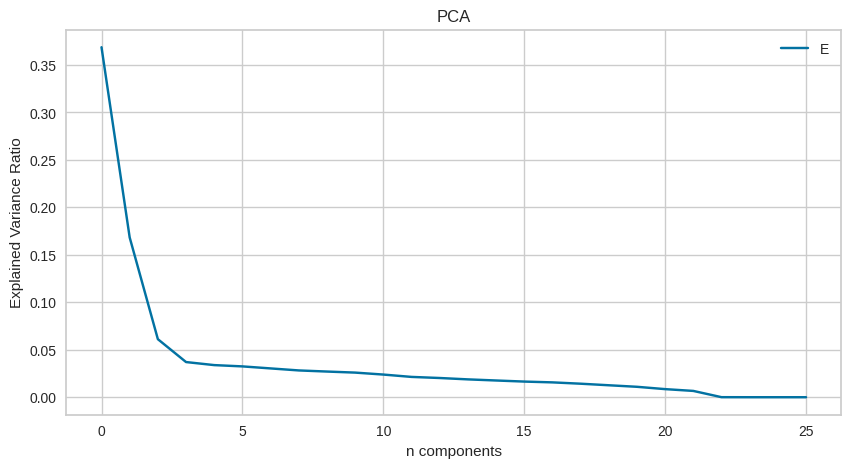

In [56]:
plt.figure(figsize=(10,5))
plt.title('PCA')
plt.plot(pca.explained_variance_ratio_)
plt.legend('Explained Variance')
plt.xlabel('n components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [57]:
n_components=3
pca = PCA(n_components=n_components)
x_pca=pca.fit_transform(X)
df_pca = pd.DataFrame(x_pca,columns=['PC{}'.format(i+1)for i in range(n_components)])
df_pca.head()

,PC1,PC2,PC3
0,-1.987631,-0.307202,0.833330
1,-0.446228,0.710002,0.918029
2,-1.643001,-0.522023,1.111899
3,-0.231947,1.267383,1.290405
4,-1.388945,-1.543027,-0.359949


In [58]:
print(pca.explained_variance_ratio_)

[0.36866    0.168257   0.06113407]


In [59]:
pca.components_

array([[-2.02365264e-03,  3.06942820e-02,  9.76197842e-02,
         1.44223602e-02,  4.60127524e-01,  2.09628957e-02,
         1.52759585e-01,  1.15013900e-01,  1.53139865e-01,
         1.62777059e-01,  1.24918280e-01,  1.74007058e-01,
         1.75172941e-01,  6.68538610e-02,  4.62947892e-01,
         5.70634591e-01, -1.20192148e-01,  3.77023551e-02,
         8.24897924e-02,  4.65481311e-02,  4.44979314e-02,
         4.22207945e-03, -9.52681420e-02, -1.40675004e-02,
         1.36368966e-01, -1.22301466e-01],
       [ 7.18556065e-03, -8.07622138e-02,  1.28555310e-01,
         1.31859911e-01,  5.00520606e-01, -4.14721987e-02,
        -6.79778907e-02,  4.85540878e-02, -1.41170802e-02,
        -2.11038187e-02,  3.73315933e-02, -1.16744167e-01,
        -1.14114270e-01, -1.64832235e-01, -5.27464729e-01,
         1.24748303e-01, -2.98960002e-01,  7.89176834e-02,
         2.20042319e-01,  7.29242084e-02,  7.69119669e-02,
        -2.22712882e-01,  7.28767070e-02,  9.20302944e-02,
        -2.98

In [60]:
print(pca.components_.shape)

(3, 26)


In [61]:
loading_scores = pd.Series(pca.components_[0], index=X.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_features = sorted_loading_scores[0:26].index.values
print(loading_scores[top_features])

TotalCharges                               0.570635
MonthlyCharges                             0.462948
tenure                                     0.460128
StreamingMovies                            0.175173
StreamingTV                                0.174007
DeviceProtection                           0.162777
OnlineBackup                               0.153140
MultipleLines                              0.152760
InternetService_Fiber optic                0.136369
TechSupport                                0.124918
InternetService_No                        -0.122301
Contract_Month-to-month                   -0.120192
OnlineSecurity                             0.115014
Partner                                    0.097620
PaymentMethod_Mailed check                -0.095268
Contract_Two year                          0.082490
PaperlessBilling                           0.066854
PaymentMethod_Bank transfer (automatic)    0.046548
PaymentMethod_Credit card (automatic)      0.044498
Contract_One

In [62]:
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=df_pca.index, color_discrete_sequence=['#C00000', '#00B050', '#0070C0'])
fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()

In [63]:
# Correlation Matrix 
correlation_matrix = X.corr()
correlation_matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.013093,-0.000807,...,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199,0.007584,-0.011189,0.004745
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987,-0.108276,0.254923,-0.182519
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948,-0.001043,0.001235,-0.000286
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448,0.051593,-0.164101,0.138383
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181,0.013786,0.017930,-0.037529
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463,-0.452255,0.290183,0.171817
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672,-0.200318,0.366420,-0.210794
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918,0.320343,-0.030506,-0.332799
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075,0.156765,0.165940,-0.380990
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325,0.145150,0.176356,-0.380151


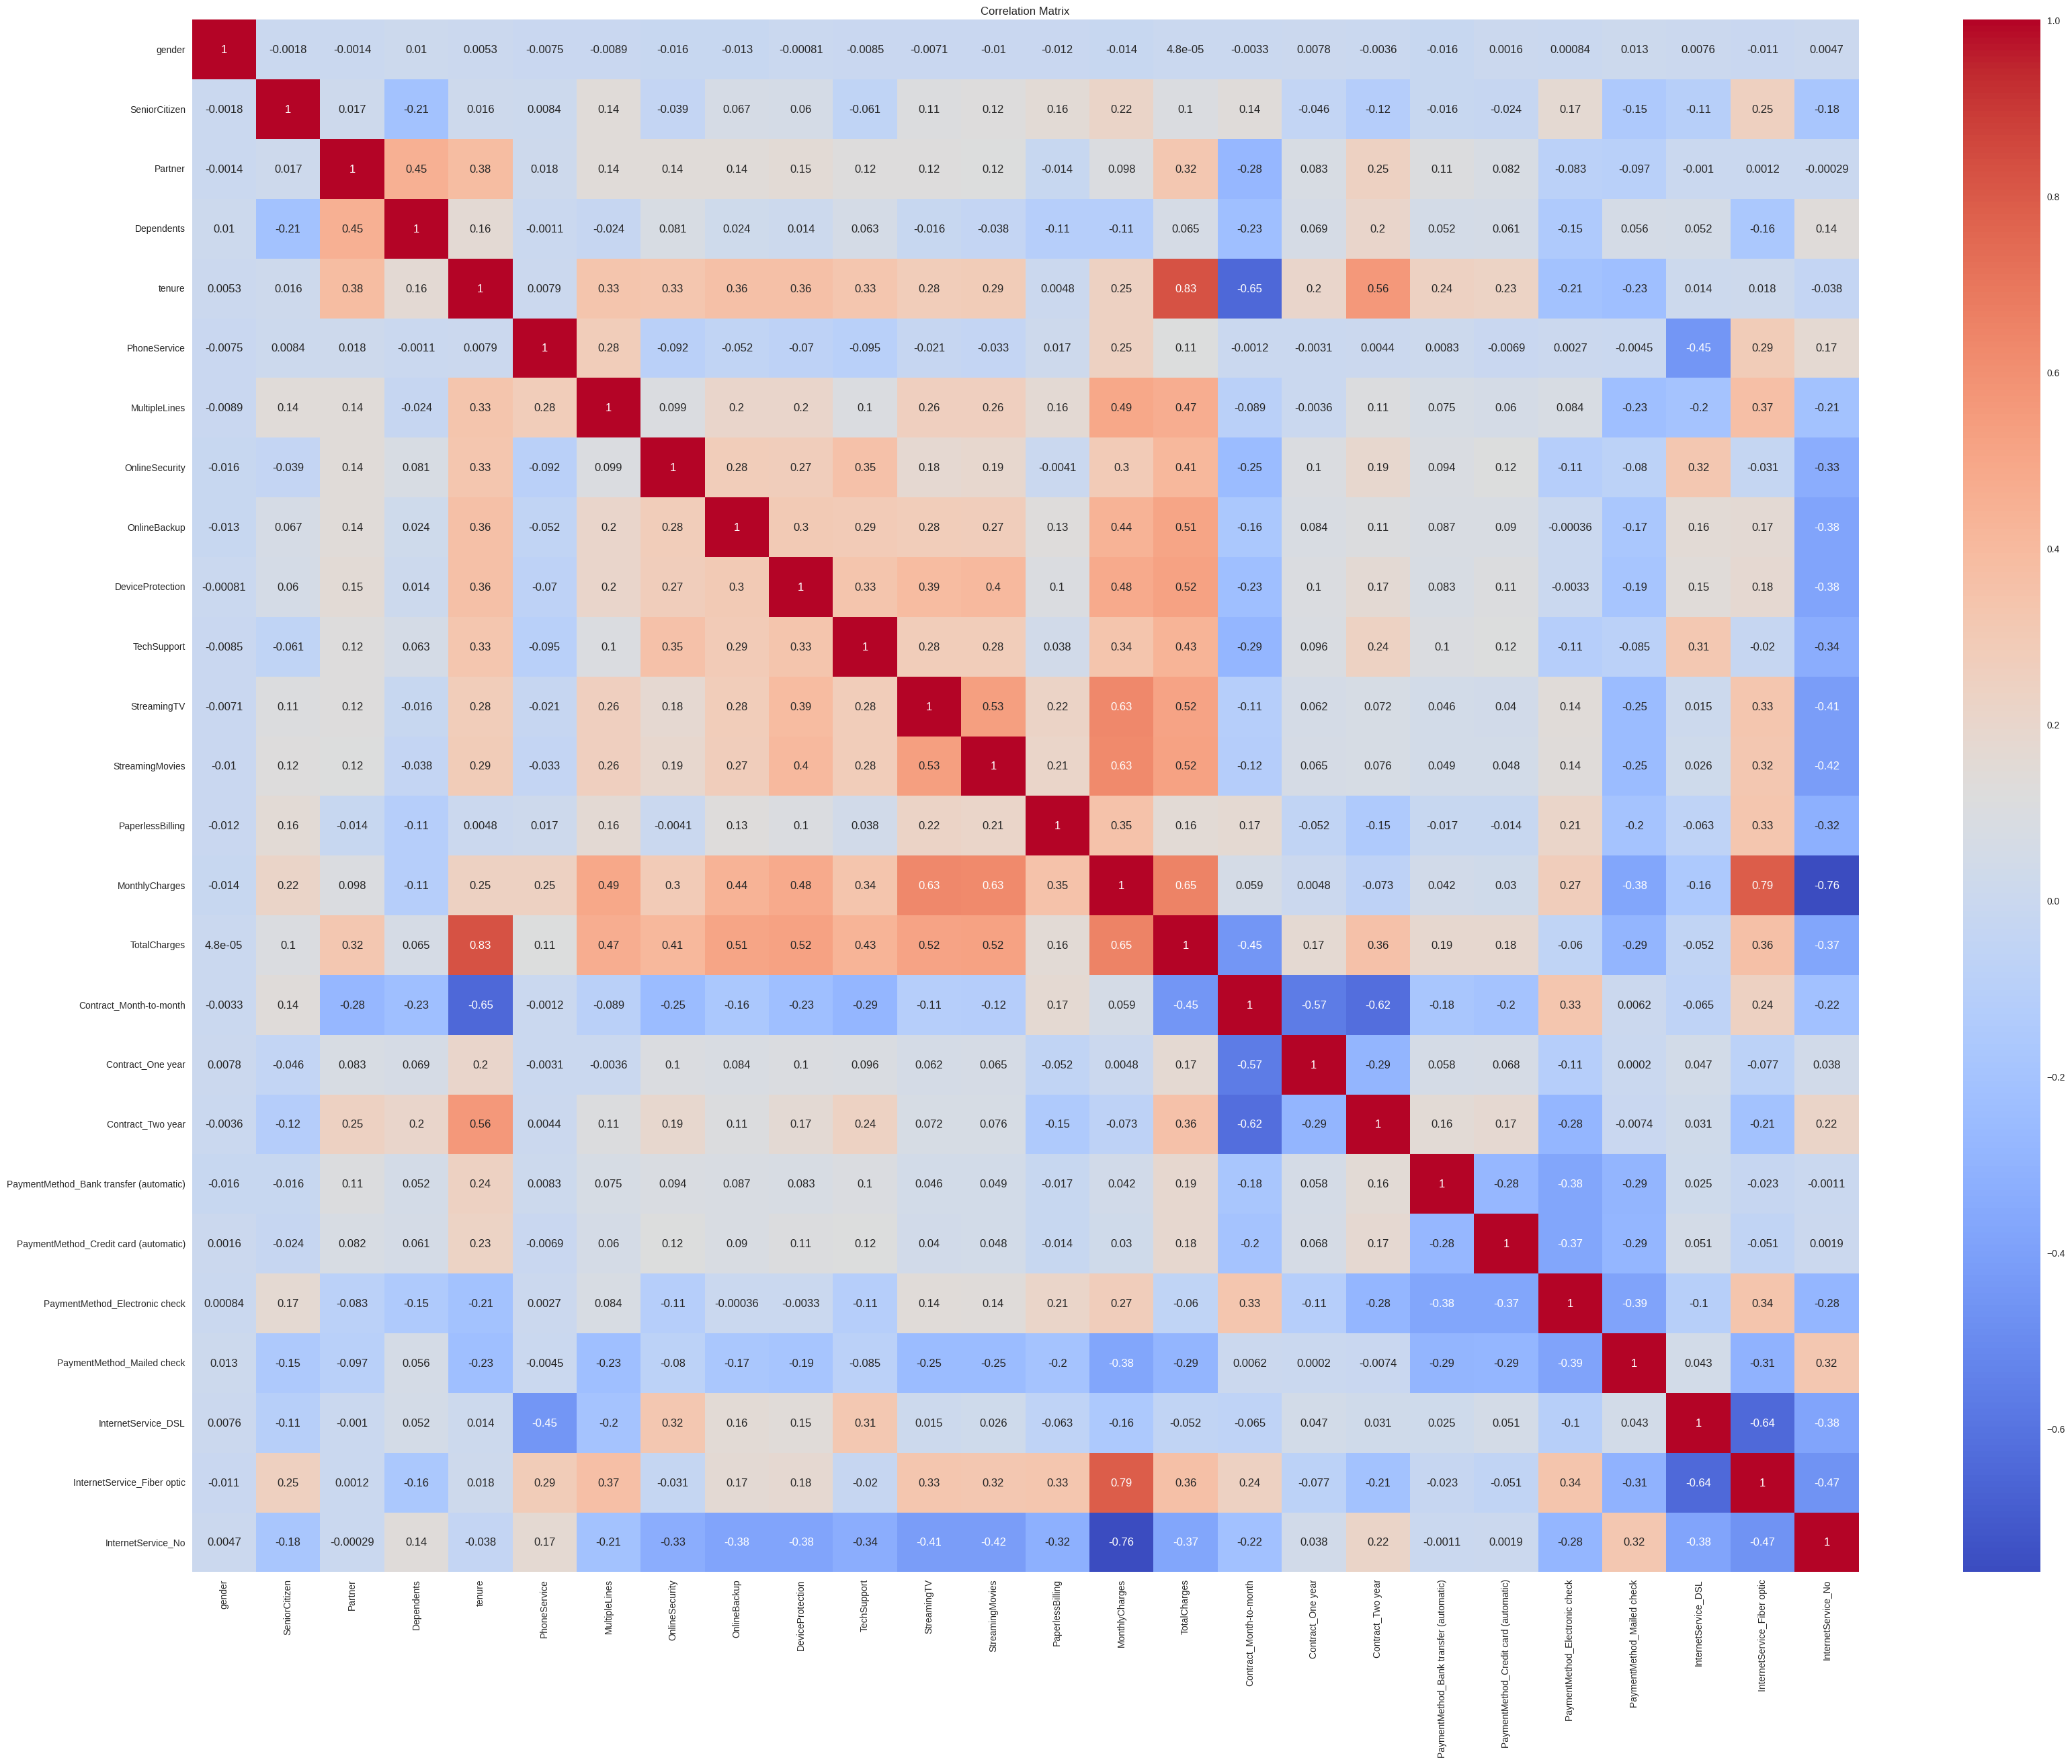

In [64]:
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [65]:
corr_features=[]
for i in correlation_matrix.columns :
    for j in correlation_matrix.index :
        if correlation_matrix.loc[i,j] >= 0.55 or correlation_matrix.loc[i,j] <= -0.55 : 
            if correlation_matrix.loc[i,j] == 1 : 
                continue 
            else : 
                print(f"Column : {i}\t\t Row : {j}\t\t Correlation value : {correlation_matrix.loc[i,j]}")
                print("-"*200) 
                corr_features.append([i,j])
    

Column : tenure		 Row : TotalCharges		 Correlation value : 0.8258804609332
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Column : tenure		 Row : Contract_Month-to-month		 Correlation value : -0.649345648869029
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Column : tenure		 Row : Contract_Two year		 Correlation value : 0.563800500228653
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Column : StreamingTV		 Row : MonthlyCharges		 Correlation value : 0.6296678921767335
------------------------------------------------------------------

In [66]:
corr_features

[['tenure', 'TotalCharges'],
 ['tenure', 'Contract_Month-to-month'],
 ['tenure', 'Contract_Two year'],
 ['StreamingTV', 'MonthlyCharges'],
 ['StreamingMovies', 'MonthlyCharges'],
 ['MonthlyCharges', 'StreamingTV'],
 ['MonthlyCharges', 'StreamingMovies'],
 ['MonthlyCharges', 'TotalCharges'],
 ['MonthlyCharges', 'InternetService_Fiber optic'],
 ['MonthlyCharges', 'InternetService_No'],
 ['TotalCharges', 'tenure'],
 ['TotalCharges', 'MonthlyCharges'],
 ['Contract_Month-to-month', 'tenure'],
 ['Contract_Month-to-month', 'Contract_One year'],
 ['Contract_Month-to-month', 'Contract_Two year'],
 ['Contract_One year', 'Contract_Month-to-month'],
 ['Contract_Two year', 'tenure'],
 ['Contract_Two year', 'Contract_Month-to-month'],
 ['InternetService_DSL', 'InternetService_Fiber optic'],
 ['InternetService_Fiber optic', 'MonthlyCharges'],
 ['InternetService_Fiber optic', 'InternetService_DSL'],
 ['InternetService_No', 'MonthlyCharges']]

In [67]:
corr_names = []
corr_features_count=[]
for feature in corr_features: 
        corr_names.append(feature[0])
        
for feature in corr_names:
    if [feature,corr_names.count(feature)] not in corr_features_count : 
        corr_features_count.append([feature,corr_names.count(feature)])

In [68]:
corr_features_count

[['tenure', 3],
 ['StreamingTV', 1],
 ['StreamingMovies', 1],
 ['MonthlyCharges', 5],
 ['TotalCharges', 2],
 ['Contract_Month-to-month', 3],
 ['Contract_One year', 1],
 ['Contract_Two year', 2],
 ['InternetService_DSL', 1],
 ['InternetService_Fiber optic', 2],
 ['InternetService_No', 1]]

In [69]:
BlackList=['tenure','MonthlyCharges','Contract_Month-to-month','InternetService_DSL','PhoneService']

In [70]:
X.drop(BlackList,axis='columns',inplace=True)

In [71]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaperlessBilling,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,0,0,1,0,0,0,...,1,-0.994194,0,0,0,0,1,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,-0.173740,1,0,0,0,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,...,1,-0.959649,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,1,0,...,0,-0.195248,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,-0.940457,0,0,0,0,1,0,1,0


In [72]:
my_dfv2=pd.DataFrame(X)

In [73]:
my_dfv2['Churn']=Y

In [74]:
my_dfv2=my_dfv2.drop_duplicates()

In [75]:
my_dfv2.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,Churn
0,0,0,1,0,0,0,1,0,0,0,...,-0.994194,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,-0.173740,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,1,0,0,0,...,-0.959649,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,1,1,0,...,-0.195248,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,-0.940457,0,0,0,0,1,0,1,0,1


**Customer Churn Profiling Report**

In [76]:
# Brief about a our dataset
profile=profile_report.ProfileReport(my_dfv2,title='Customer Churn Profiling Report')

In [77]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [78]:
X=my_dfv2.iloc[:,:-1]
Y=my_dfv2.iloc[:,-1]

**Split Dataset**

In [79]:
# split dataset
x_train, x_test , y_train , y_test = train_test_split(X , Y , train_size = 0.75 , random_state=0)

In [80]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [81]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((5256, 21), (5256,), (1753, 21), (1753,))

**Train the models & Evaluate the models**

1. Logistic Regression
1. Decision Tree 
1. SVM ( Support Vector Machine ) 
1. Random Forest
1. Neural network model 

In [82]:
param_grid = {
    # 'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [83]:
# Logistic Regression 

classifier=LogisticRegression(random_state=42)
grid_search = GridSearchCV(classifier, param_grid, cv=5)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
train_score1 = grid_search.best_score_

print("Best hyperparameters: ", best_params)
print("Logistic Regression Classifier (train score) : ", train_score1)

accuracy1=grid_search.score(x_test, y_test)

print(f"Logistic Regression Classifier (test score) : {accuracy1}")

Best hyperparameters:  {'C': 0.01}
Logistic Regression Classifier (train score) :  0.7971828387232149
Logistic Regression Classifier (test score) : 0.793496862521392


Logistic Regression Classifier (confusion matrix) :

[[1196  106]
 [ 256  195]]

Recall : 0.43237250554323725
Precision : 0.6478405315614618
F1 Score 0.5186170212765958



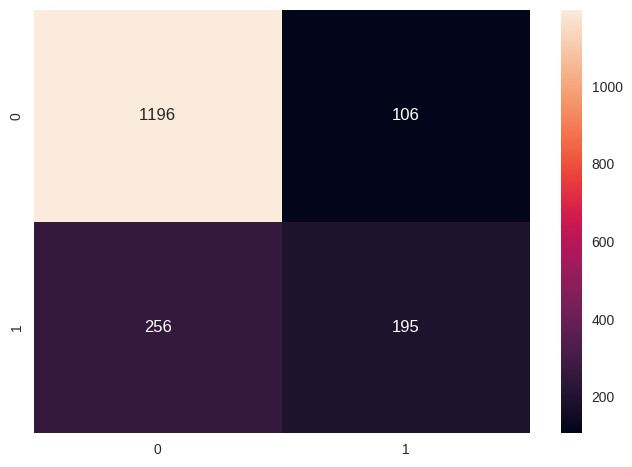

In [84]:
y_pred=grid_search.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print("Logistic Regression Classifier (confusion matrix) :\n")
print(cm)
print(f"\nRecall : {recall_score(y_test,y_pred)}")
print(f"Precision : {precision_score(y_test,y_pred)}")
print(f"F1 Score {f1_score(y_test,y_pred)}\n")

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

In [85]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_leaf_nodes':[5,8,10],
}

In [86]:
# DT

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5)

grid_search.fit(x_train,y_train)

train_score2 = grid_search.best_score_

print("Best parameters:", grid_search.best_params_)

print("Decision Tree Classifier (train score) : ", train_score2)


accuracy2=grid_search.score(x_test, y_test)


print("Decision Tree Classifier (test score) : ", accuracy2)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classifier (train score) :  0.7916666365185429
Decision Tree Classifier (test score) :  0.7826583000570451


Decision Tree Classifier (confusion matrix) :

[[1134  168]
 [ 213  238]]

Recall : 0.5277161862527716
Precision : 0.5862068965517241
F1 Score 0.5554259043173863



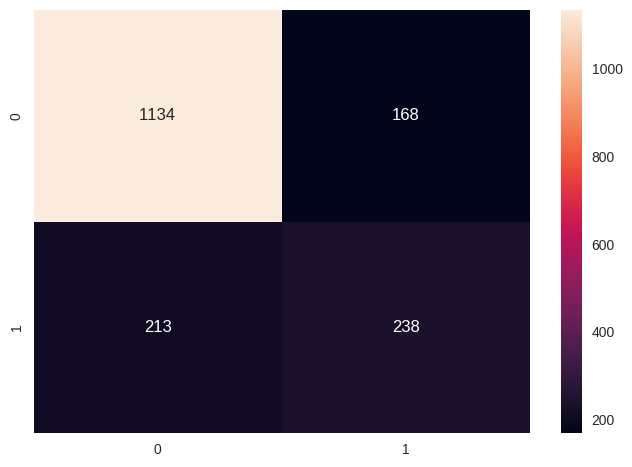

In [87]:
y_pred=grid_search.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier (confusion matrix) :\n")
print(cm)
print(f"\nRecall : {recall_score(y_test,y_pred)}")
print(f"Precision : {precision_score(y_test,y_pred)}")
print(f"F1 Score {f1_score(y_test,y_pred)}\n")

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

In [88]:
# SVM

classifier = SVC(kernel='rbf', C=1, random_state=42)

classifier = classifier.fit(x_train, y_train)

train_score3=classifier.score(x_train,y_train)
print("SVM Classifier (train score) : ",train_score3)

accuracy3 = classifier.score(x_test, y_test)

print('SVM Classifier (test score) : ',accuracy3)

SVM Classifier (train score) :  0.8171613394216134
SVM Classifier (test score) :  0.7974900171135196


SVM Classifier (confusion matrix) :

[[1182  120]
 [ 235  216]]

Recall : 0.4789356984478936
Precision : 0.6428571428571429
F1 Score 0.5489199491740788



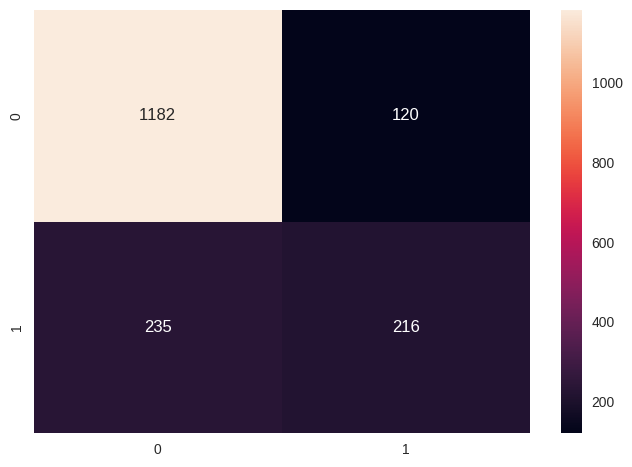

In [89]:
y_pred=classifier.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print("SVM Classifier (confusion matrix) :\n")
print(cm)
print(f"\nRecall : {recall_score(y_test,y_pred)}")
print(f"Precision : {precision_score(y_test,y_pred)}")
print(f"F1 Score {f1_score(y_test,y_pred)}\n")

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

In [90]:
# Random Forest

rfc=RandomForestClassifier(max_depth=5,n_estimators=10,max_features=10, random_state=42)

rfc.fit(x_train, y_train)
train_score4=rfc.score(x_train,y_train)
print("Random Forest Classifier (test score) : ",train_score4)
accuracy4 = rfc.score(x_test, y_test)
print("Random Forest Classifier (test score) : ", accuracy4)

Random Forest Classifier (test score) :  0.8068873668188736
Random Forest Classifier (test score) :  0.7929264118653736


Random Forest Classifier (confusion matrix) :

[[1163  139]
 [ 224  227]]

Recall : 0.5033259423503326
Precision : 0.6202185792349727
F1 Score 0.5556915544675642



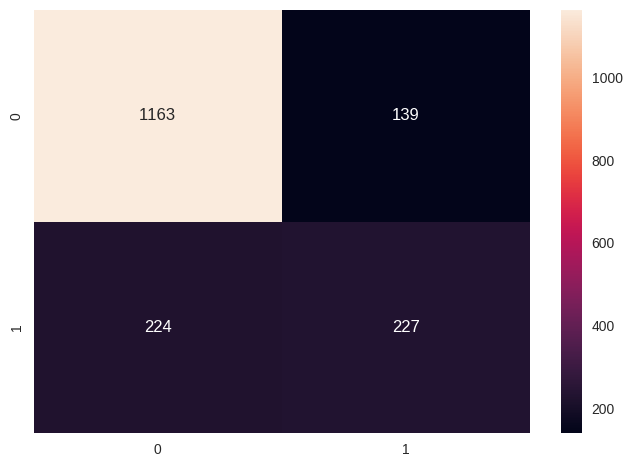

In [91]:
y_pred=rfc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print("Random Forest Classifier (confusion matrix) :\n")
print(cm)
print(f"\nRecall : {recall_score(y_test,y_pred)}")
print(f"Precision : {precision_score(y_test,y_pred)}")
print(f"F1 Score {f1_score(y_test,y_pred)}\n")

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

In [92]:
# Neural Network Model (Tensorflow)
tf.random.set_seed(41)
model=Sequential(
    [
        tf.keras.Input(shape=(21,)),
        Dense(10 , activation='relu' , name = 'layer1') , 
        Dense(10 , activation='relu' , name = 'layer2') , 
        Dense(1 , activation='sigmoid' , name = 'layer3')
    ]
) 

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                220       
                                                                 
 layer2 (Dense)              (None, 10)                110       
                                                                 
 layer3 (Dense)              (None, 1)                 11        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

In [95]:
history=model.fit(x_train,y_train,epochs=10,verbose=1)

Epoch 1/10
165/165 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.7865
Epoch 2/10
165/165 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7909
Epoch 3/10
165/165 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.7939
Epoch 4/10
165/165 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.7991
Epoch 5/10
165/165 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8056
Epoch 6/10
165/165 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8054
Epoch 7/10
165/165 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8033
Epoch 8/10
165/165 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8046
Epoch 9/10
165/165 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8073
Epoch 10/10
165/165 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8056

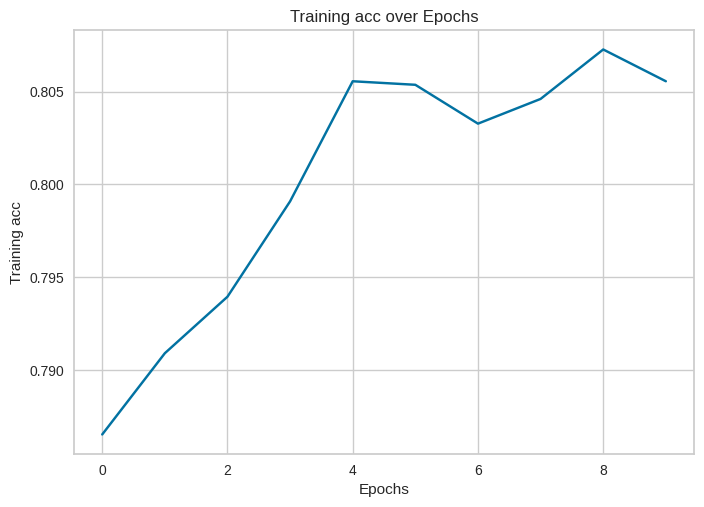

In [96]:
plt.plot(history.epoch, history.history['accuracy'])
plt.title('Training acc over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training acc')
plt.show()

In [97]:
train_score5=history.history['accuracy'][-1]

In [98]:
print("Neural Network Classifier 1 (test score) : ",train_score5)

Neural Network Classifier 1 (test score) :  0.8055555820465088


In [99]:
test_loss , accuracy5 = model.evaluate(x_test,y_test)

55/55 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.7986


In [100]:
print("Neural Network Classifier 1 (test score) : ", accuracy5)

Neural Network Classifier 1 (test score) :  0.7986308932304382


55/55 [==============================] - 0s 1ms/step
Neural Network Classifier (confusion matrix) :

[[1141  161]
 [ 192  259]]

Recall : 0.5742793791574279
Precision : 0.6166666666666667
F1 Score 0.5947187141216992



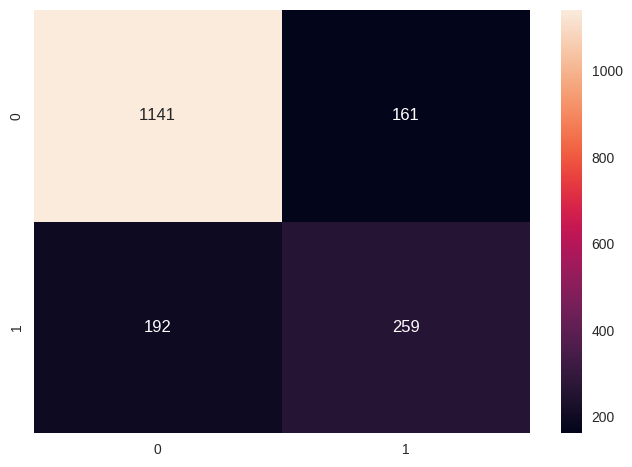

In [101]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred.round())
print("Neural Network Classifier (confusion matrix) :\n")
print(cm)
print(f"\nRecall : {recall_score(y_test,y_pred.round())}")
print(f"Precision : {precision_score(y_test,y_pred.round())}")
print(f"F1 Score {f1_score(y_test,y_pred.round())}\n")

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

In [102]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.FloatTensor(y_train)
y_test=torch.FloatTensor(y_test)

In [103]:
y_train=y_train.unsqueeze(dim=1)
y_test=y_test.unsqueeze(dim=1)

In [104]:
def param_count(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    print('Total number of parameters : ', sum(params))

In [105]:
# Neural Network Model (Pytorch)
class BasicNN(nn.Module) : 
    def __init__(self,input_shape,hidden_units,output) : 
        super().__init__() 
        self.layer1=nn.Linear(input_shape,hidden_units)
        self.layer2=nn.Linear(hidden_units,hidden_units)
        self.out=nn.Linear(hidden_units,output)
        
    def forward(self,x) : 
        x=F.relu(self.layer1(x))
        x=F.relu(self.layer2(x))
        x=F.sigmoid(self.out(x))
        
        return x 

In [106]:
torch.manual_seed(41)
model=BasicNN(input_shape=21,hidden_units=10,output=1)

In [107]:
model.parameters

<bound method Module.parameters of BasicNN(
  (layer1): Linear(in_features=21, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
)>

In [108]:
param_count(model)

Total number of parameters :  341


In [109]:
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

layer1.weight 	 torch.Size([10, 21])
layer1.bias 	 torch.Size([10])
layer2.weight 	 torch.Size([10, 10])
layer2.bias 	 torch.Size([10])
out.weight 	 torch.Size([1, 10])
out.bias 	 torch.Size([1])


In [110]:
criterion=nn.BCELoss()
optimizer=Adam(model.parameters(), lr=0.01)

In [111]:
epochs=100
losses=[]
for i in tqdm(range(epochs)) : 
    y_pred=model.forward(x_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    
    if i % 10 == 0 : 
        print(f"Epoch : {i} , loss : {loss}")
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch : 0 , loss : 0.6713603138923645
Epoch : 10 , loss : 0.5557194948196411
Epoch : 20 , loss : 0.47342756390571594
Epoch : 30 , loss : 0.44165828824043274
Epoch : 40 , loss : 0.4334544539451599
Epoch : 50 , loss : 0.42471829056739807
Epoch : 60 , loss : 0.4198077917098999
Epoch : 70 , loss : 0.41628819704055786
Epoch : 80 , loss : 0.41210073232650757
Epoch : 90 , loss : 0.4081847667694092


In [112]:
print(f"The total loss in training data is : {losses[-1]}")

The total loss in training data is : 0.40462541580200195


Text(0.5, 0, 'epochs')

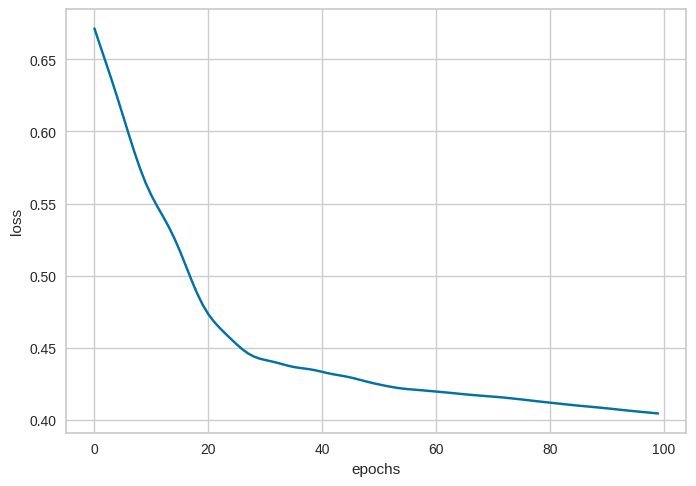

In [113]:
plt.plot(range(epochs) , losses)
plt.ylabel('loss')
plt.xlabel('epochs')

In [114]:
with torch.no_grad() : 
    y_pred = model.forward(x_test)
    test_loss=criterion(y_pred, y_test)

In [115]:
print(f"The loss in the testing data is : {test_loss}")

The loss in the testing data is : 0.43299993872642517


In [116]:
y_train_pred=[]
with torch.no_grad() : 
    for i , data in tqdm(enumerate(x_train)) : 
        y_pred=model.forward(data)
        y_pred=torch.round(y_pred)
        y_train_pred.append(y_pred.detach().numpy())

0it [00:00, ?it/s]

In [117]:
y_test_pred=[]
with torch.no_grad() : 
    for i , data in tqdm(enumerate(x_test)) : 
        y_pred=model.forward(data)
        y_pred=torch.round(y_pred)
        y_test_pred.append(y_pred.detach().numpy())

0it [00:00, ?it/s]

In [118]:
train_score6=accuracy_score(y_train,y_train_pred)
print("Neural Network Classifier 2 (test score) : ",train_score6)

Neural Network Classifier 2 (test score) :  0.8074581430745814


In [119]:
accuracy6=accuracy_score(y_test,y_test_pred)
print("Neural Network Classifier 2 (test score) : ", accuracy6)

Neural Network Classifier 2 (test score) :  0.8083285795778665


Neural Network Classifier (confusion matrix) :

[[1173  129]
 [ 207  244]]

Recall : 0.541019955654102
Precision : 0.6541554959785523
F1 Score 0.5922330097087378



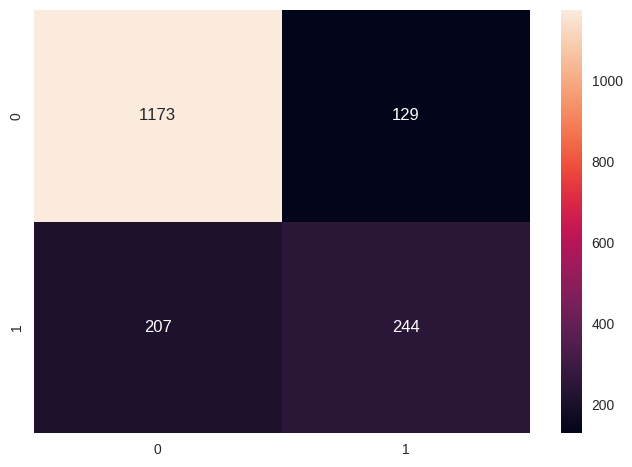

In [120]:
cm=confusion_matrix(y_test,y_test_pred)
print("Neural Network Classifier (confusion matrix) :\n")
print(cm)
print(f"\nRecall : {recall_score(y_test,y_test_pred)}")
print(f"Precision : {precision_score(y_test,y_test_pred)}")
print(f"F1 Score {f1_score(y_test,y_test_pred)}\n")

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

**Compare between models**

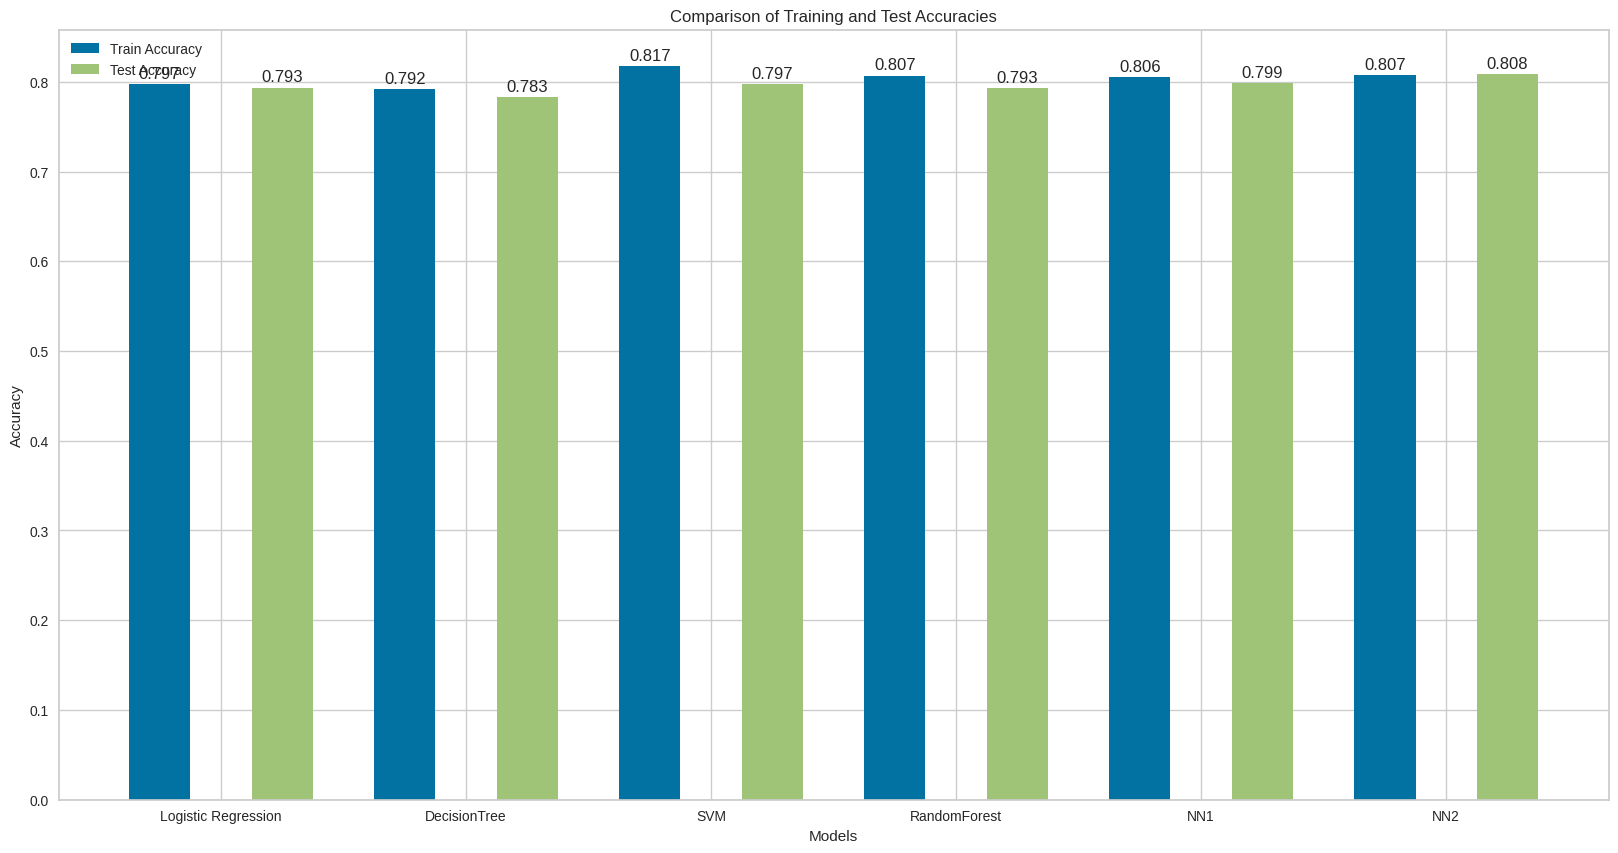

In [121]:
# plot all models 

train_scores=[train_score1,train_score2,train_score3,train_score4,train_score5,train_score6]
test_scores=[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]

models = ['Logistic Regression', 'DecisionTree', 'SVM', 'RandomForest','NN1','NN2']

x = np.arange(len(models))

width = 0.25

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width, train_scores, width, label='Train Accuracy')

rects2 = ax.bar(x + width, test_scores, width, label='Test Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Test Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()